In [10]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
# Twitter Api Credentials
consumerKey = "8gLK2DEUQVG51lEc9ieCC9Q4E"
consumerSecret = "GwZ9LDqqSMrhNUVnsDxiAjOuE1KXSZLmjQhrXNBGtFkP3n9Oqq"
accessToken = "1334056289769385986-34qT5Mqu1N3njNIkSv5NN04F28yXl9"
accessTokenSecret = "7bhxg34h6gNpWfEFwUvXacbuGKD8fhT6GPyzCVebWS3DI"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [22]:

# Extract 2000 tweets from the twitter user
posts = api.user_timeline(screen_name="indosatOoredoo", count = 1000, lang ="id", tweet_mode="extended")

#  Print the last 20 tweets
print("Show the 20 recent tweets:\n")
i=1
for tweet in posts[:100]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 20 recent tweets:

1) @ViranisaN Hai Kak Vira, maaf ats keluhan yg dialami. Agar dapat kami bantu cek lebih lanjut, yuk infoin data detailnya melalui DM ya. Salam^Alya https://t.co/GfAYuR1Kso

2) @MoeslihKhaboell Hai Kak Muslih,  mohon maaf atas kendala yg dialami. Utk saat ini kami sedang berupaya agar akses kembali normal ya Kak. Mohon dicek secara berkala. Salam^Lya

3) @gabriellajstne Hai Kak Gabriella, maaf banget buat kendalanya. Terkait paket Freedom internet akan kembali berjalan jika kuota bonusnya sudah habis. Salam^Ayu

4) @MahendraArie Baik, sama sama kak, mohon menunggu atau cek pulsa berkala melalui *123# atau aplikasi MYIM3 ya kak. Salam^Fye

5) @MahendraArie Hi kak Arie, sudah kami informasikan via Dm ya. Salam^Estu

6) @IraRahm86124734 Maaf Kak Ira, yuk bisa restart Hp dulu utk pancing jaringannya lalu coba kembali akses internetnya. Jika masih sama infoin detailnya di https://t.co/GfAYuR1Kso ya Kak, mimin tunggu. Thanks^Marsha.

7) @RenaldoSamosir Hai Kak Ren

In [23]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,"@ViranisaN Hai Kak Vira, maaf ats keluhan yg d..."
1,"@MoeslihKhaboell Hai Kak Muslih, mohon maaf a..."
2,"@gabriellajstne Hai Kak Gabriella, maaf banget..."
3,"@MahendraArie Baik, sama sama kak, mohon menun..."
4,"@MahendraArie Hi kak Arie, sudah kami informas..."


In [24]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('\n\n', '',text) #menghapus tanda \n\n
 text = re.sub('_', '',text) #menghapus tanda _
 text = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", text)
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Hai Kak Vira maaf ats keluhan yg dialami Agar...
1,Hai Kak Muslih mohon maaf atas kendala yg di...
2,Hai Kak Gabriella maaf banget buat kendalanya...
3,Baik sama sama kak mohon menunggu atau cek pu...
4,Hi kak Arie sudah kami informasikan via Dm ya...
...,...
195,3 Hai Kak maaf untuk pengalamannya ya Yuk coba...
196,3009 Hai Kak Alfia maaf atas hal yg di alami A...
197,1 Baik kaksilakan bisa informasikan lokasi det...
198,Hai Kak detailnya sudah Kami infokan via DM S...


In [25]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Hai Kak Vira maaf ats keluhan yg dialami Agar...,0.00,0.00
1,Hai Kak Muslih mohon maaf atas kendala yg di...,0.65,0.15
2,Hai Kak Gabriella maaf banget buat kendalanya...,0.00,0.00
3,Baik sama sama kak mohon menunggu atau cek pu...,0.00,0.00
4,Hi kak Arie sudah kami informasikan via Dm ya...,0.00,0.00
...,...,...,...
195,3 Hai Kak maaf untuk pengalamannya ya Yuk coba...,0.00,0.00
196,3009 Hai Kak Alfia maaf atas hal yg di alami A...,0.00,0.00
197,1 Baik kaksilakan bisa informasikan lokasi det...,0.00,0.00
198,Hai Kak detailnya sudah Kami infokan via DM S...,0.00,0.00


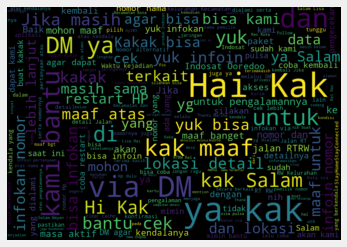

In [26]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=100).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Hai Kak Vira maaf ats keluhan yg dialami Agar...,0.00,0.00,Neutral
1,Hai Kak Muslih mohon maaf atas kendala yg di...,0.65,0.15,Positive
2,Hai Kak Gabriella maaf banget buat kendalanya...,0.00,0.00,Neutral
3,Baik sama sama kak mohon menunggu atau cek pu...,0.00,0.00,Neutral
4,Hi kak Arie sudah kami informasikan via Dm ya...,0.00,0.00,Neutral
...,...,...,...,...
195,3 Hai Kak maaf untuk pengalamannya ya Yuk coba...,0.00,0.00,Neutral
196,3009 Hai Kak Alfia maaf atas hal yg di alami A...,0.00,0.00,Neutral
197,1 Baik kaksilakan bisa informasikan lokasi det...,0.00,0.00,Neutral
198,Hai Kak detailnya sudah Kami infokan via DM S...,0.00,0.00,Neutral


In [28]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1)  Hai Kak Muslih  mohon maaf atas kendala yg dialami Utk saat ini kami sedang berupaya agar akses kembali normal ya Kak Mohon dicek secara berkala Salam^Lya

2) 2 Hi Miss Aulia Regarding the eSIM Product That is entered it is not yet available Thank you for using Indosat's service Regard^Chun

3) Fueru Album merupakan unlimited &amp free cloud photo storage dimana foto dapat diolah menjadi produk berupa photo print album kalendar kartu ucapan hingga kue

4) ami Hai Kak maaf ya untuk pengalamannya terkait kendalanya masih dalam penanganan team terkait kak mohon di tunggu info selanjutnya ya kak Thanks  ^Vio

5)  Hi kak Rrrekhaaa mohon maaf atas kendalanya ya kak yuk clear cache serta off aplikasi berjalan dan di coba akses kembali ya kak Jika masih sama bisa infokan nomor dan lokasi detail via DM supaya kami bantu cek Salam^Fye 

6)  Hai Kak mohon maaf untuk akses data yang lambat silahkan bisa clear cache aplikasi berjalan kemudian coba akses kembali Jika m

In [29]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:



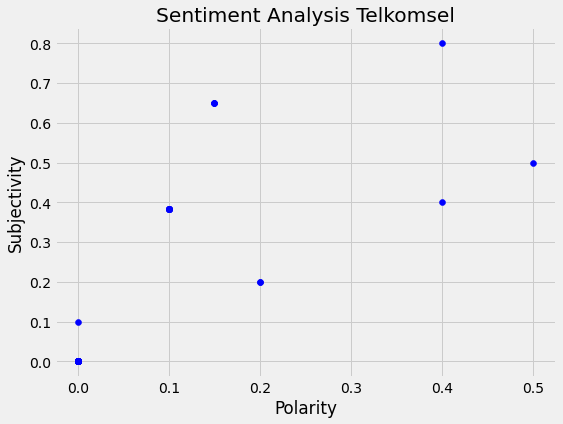

In [30]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis Telkomsel') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [31]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

9.0

In [32]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

0.0

In [33]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     182
Positive     18
Name: Analysis, dtype: int64

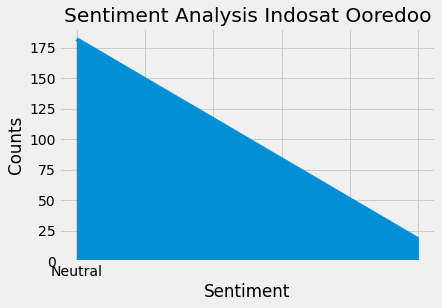

In [35]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis Indosat Ooredoo')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()

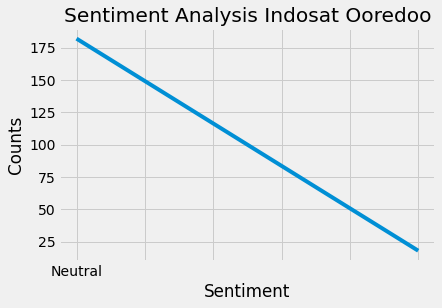

In [36]:
plt.title('Sentiment Analysis Indosat Ooredoo')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()